In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset: https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data

In [2]:
df = pd.read_csv('Auto Sales data.csv')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [7]:
df['SALES'].describe()

count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64

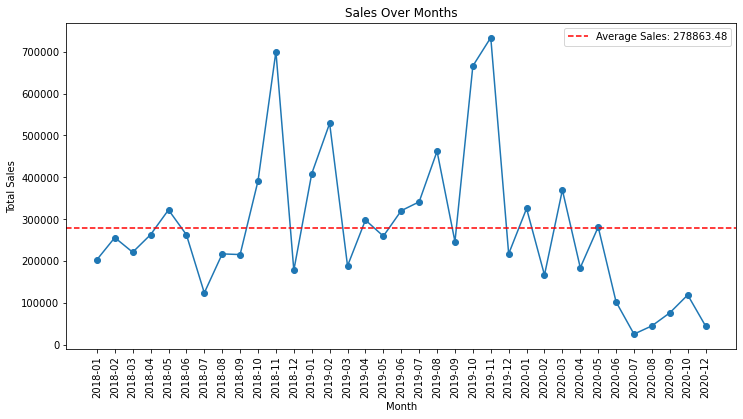

In [8]:
def plot_sales_by_month(df):
    """
    Plot total sales over months.

    Parameters:
    - df (DataFrame): Input DataFrame containing sales data with 'ORDERDATE' and 'SALES' columns.

    Returns:
    - Line Plot with sales over the timeline
    """
    
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], dayfirst=True)
    df['MONTH'] = df['ORDERDATE'].dt.to_period('M')
    sales_by_month = df.groupby('MONTH')['SALES'].sum()
    avg_sales = sales_by_month.mean()
    sales_by_month.index = sales_by_month.index.astype(str)
    plt.figure(figsize=(12, 6))
    plt.plot(sales_by_month.index, sales_by_month.values, marker='o', linestyle='-')
    plt.axhline(y=avg_sales, color='red', linestyle='--', label=f'Average Sales: {avg_sales:.2f}')
    plt.title('Sales Over Months')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()


plot_sales_by_month(df)

In [9]:
df['QUANTITYORDERED'].describe()

count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64

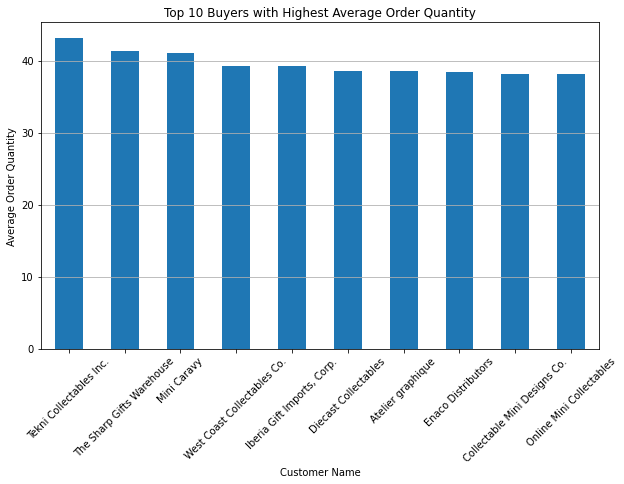

In [6]:
def plot_top_buyers_avg_order_quantity(df):
    """
    Plot the top 10 buyers with the highest average order quantity.

    Parameters:
    - df (DataFrame): Input DataFrame containing sales data with 'CUSTOMERNAME' and 'QUANTITYORDERED' columns.

    Returns:
    - Bar Plot that represents Top 10 Buyers with Highest Average Order Quantity
    """

    avg_order_quantity = df.groupby('CUSTOMERNAME')['QUANTITYORDERED'].mean()
    top_10_buyers = avg_order_quantity.sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    top_10_buyers.plot(kind='bar')
    plt.title('Top 10 Buyers with Highest Average Order Quantity')
    plt.xlabel('Customer Name')
    plt.ylabel('Average Order Quantity')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


plot_top_buyers_avg_order_quantity(df)

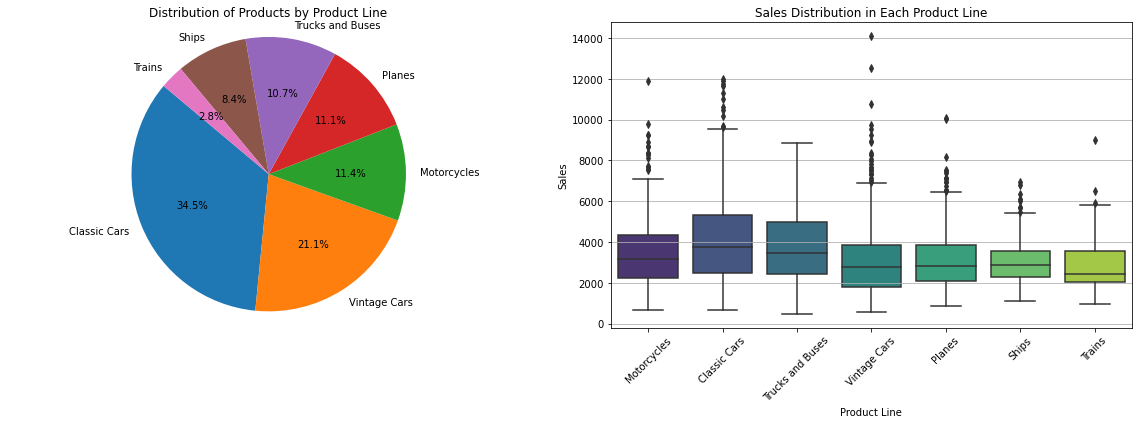

In [10]:
def plot_product_line_distribution(df):
    """
    Plot the distribution of products by product line and sales distribution in each product line.

    Parameters:
    - df (DataFrame): Input DataFrame containing sales data with 'PRODUCTLINE' and 'SALES' columns.

    Returns:
    - Pie Chart and a Box Plot
    """

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Pie chart for distribution of products by product line
    product_line_counts = df['PRODUCTLINE'].value_counts()
    axes[0].pie(product_line_counts, labels=product_line_counts.index, autopct='%1.1f%%', startangle=140)
    axes[0].set_title('Distribution of Products by Product Line')
    axes[0].axis('equal')
    
    # Boxplot for sales distribution in each product line
    sns.boxplot(x='PRODUCTLINE', y='SALES', data=df, palette='viridis', ax=axes[1])
    axes[1].set_title('Sales Distribution in Each Product Line')
    axes[1].set_xlabel('Product Line')
    axes[1].set_ylabel('Sales')
    axes[1].set_xticklabels(df['PRODUCTLINE'].unique(), rotation=45)
    axes[1].grid(axis='y')
    plt.tight_layout()
    plt.show()


plot_product_line_distribution(df)

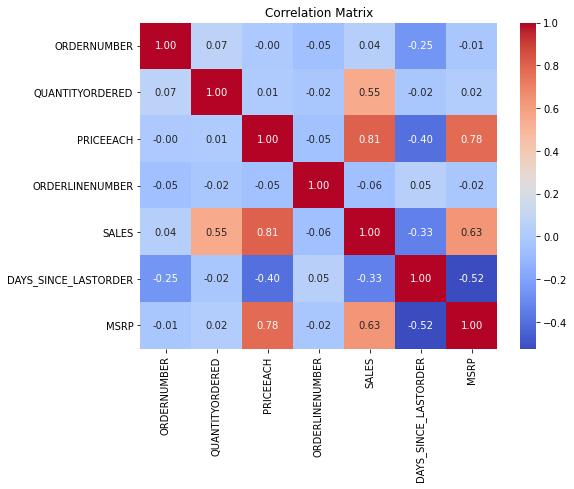

In [12]:
def plot_correlation_matrix(df):
    """
    Plot correlation matrix for a given dataframe.

    Parameters:
    df (DataFrame): Input dataframe containing numerical columns.

    Returns:
    None. Displays the correlation matrix heatmap.
    """
    
    corr_matrix = df.corr(numeric_only=True)
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()


plot_correlation_matrix(df)